In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
lunitmodel = pd.read_csv('../../stock/루닛 모델링 최종.csv', encoding='cp949')

In [3]:
lunitmodel

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,sentiment_score,newslabel
0,A328130,루닛,20220721,1530,40000,40000,40000,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,4.0,1
1,A328130,루닛,20220721,1520,39800,40000,39500,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,11.0,1
2,A328130,루닛,20220721,1519,39750,39950,39550,39850,3543452,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,0.0,0
3,A328130,루닛,20220721,1518,39850,40000,39700,39750,3528384,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,-1.0,-1
4,A328130,루닛,20220721,1517,39750,40000,39700,39850,3488063,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,A328130,루닛,20230717,905,172200,174300,171100,173800,37178,175100,176960,181501.31120,177735.0,173968.68880,33.349690,-629.020578,100.000000,42.857143,NaN,-1
90222,A328130,루닛,20230717,904,174000,174000,172000,172200,30125,174220,176240,181971.57940,177515.0,173058.42060,28.631469,-917.030007,92.857143,35.714286,NaN,0
90223,A328130,루닛,20230717,903,174100,174500,173600,174000,19916,173660,175640,182063.17300,177350.0,172636.82700,39.074422,-988.638192,85.714286,28.571429,NaN,-1
90224,A328130,루닛,20230717,902,174600,175100,173000,174400,14557,173620,175180,181961.19030,177130.0,172298.80970,41.135719,-1001.566107,78.571429,21.428571,NaN,1


In [4]:
# hi = hi.drop(columns = '누적체결매도수량')
# hi = hi.drop(columns = '누적체결매수수량')
lunitmodel = lunitmodel.drop(columns = '종목코드')
lunitmodel = lunitmodel.drop(columns = '종목명')
# hi = hi.drop(columns = '시간')
# hi = hi.drop(columns = '거래대금')

In [5]:
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,sentiment_score,newslabel
0,20220721,1530,40000,40000,40000,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,4.0,1
1,20220721,1520,39800,40000,39500,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,11.0,1
2,20220721,1519,39750,39950,39550,39850,3543452,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,0.0,0
3,20220721,1518,39850,40000,39700,39750,3528384,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,-1.0,-1
4,20220721,1517,39750,40000,39700,39850,3488063,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,20230717,905,172200,174300,171100,173800,37178,175100,176960,181501.31120,177735.0,173968.68880,33.349690,-629.020578,100.000000,42.857143,NaN,-1
90222,20230717,904,174000,174000,172000,172200,30125,174220,176240,181971.57940,177515.0,173058.42060,28.631469,-917.030007,92.857143,35.714286,NaN,0
90223,20230717,903,174100,174500,173600,174000,19916,173660,175640,182063.17300,177350.0,172636.82700,39.074422,-988.638192,85.714286,28.571429,NaN,-1
90224,20230717,902,174600,175100,173000,174400,14557,173620,175180,181961.19030,177130.0,172298.80970,41.135719,-1001.566107,78.571429,21.428571,NaN,1


In [6]:
lunitmodel['date'] = lunitmodel['날짜'].map(str) + "" + lunitmodel['시간'].map(str)
lunitmodel

,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,sentiment_score,newslabel,date
0,20220721,1530,40000,40000,40000,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,4.0,1,202207211530
1,20220721,1520,39800,40000,39500,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,11.0,1,202207211520
2,20220721,1519,39750,39950,39550,39850,3543452,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,0.0,0,202207211519
3,20220721,1518,39850,40000,39700,39750,3528384,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,-1.0,-1,202207211518
4,20220721,1517,39750,40000,39700,39850,3488063,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,2.0,1,202207211517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,20230717,905,172200,174300,171100,173800,37178,175100,176960,181501.31120,177735.0,173968.68880,33.349690,-629.020578,100.000000,42.857143,NaN,-1,20230717905
90222,20230717,904,174000,174000,172000,172200,30125,174220,176240,181971.57940,177515.0,173058.42060,28.631469,-917.030007,92.857143,35.714286,NaN,0,20230717904
90223,20230717,903,174100,174500,173600,174000,19916,173660,175640,182063.17300,177350.0,172636.82700,39.074422,-988.638192,85.714286,28.571429,NaN,-1,20230717903
90224,20230717,902,174600,175100,173000,174400,14557,173620,175180,181961.19030,177130.0,172298.80970,41.135719,-1001.566107,78.571429,21.428571,NaN,1,20230717902


In [7]:
# lunitmodel.rename(columns={'날짜':'date'}, inplace=True)
lunitmodel.rename(columns={'시가':'open'}, inplace=True)
lunitmodel.rename(columns={'고가':'high'}, inplace=True)
lunitmodel.rename(columns={'저가':'low'}, inplace=True)
lunitmodel.rename(columns={'종가':'close'}, inplace=True)
lunitmodel.rename(columns={'거래량':'volume'}, inplace=True)

In [9]:
lunitmodel

,날짜,시간,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,sentiment_score,newslabel,date
0,20220721,1530,40000,40000,40000,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,4.0,1,202207211530
1,20220721,1520,39800,40000,39500,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,11.0,1,202207211520
2,20220721,1519,39750,39950,39550,39850,3543452,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,0.0,0,202207211519
3,20220721,1518,39850,40000,39700,39750,3528384,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,-1.0,-1,202207211518
4,20220721,1517,39750,40000,39700,39850,3488063,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,2.0,1,202207211517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,20230717,905,172200,174300,171100,173800,37178,175100,176960,181501.31120,177735.0,173968.68880,33.349690,-629.020578,100.000000,42.857143,NaN,-1,20230717905
90222,20230717,904,174000,174000,172000,172200,30125,174220,176240,181971.57940,177515.0,173058.42060,28.631469,-917.030007,92.857143,35.714286,NaN,0,20230717904
90223,20230717,903,174100,174500,173600,174000,19916,173660,175640,182063.17300,177350.0,172636.82700,39.074422,-988.638192,85.714286,28.571429,NaN,-1,20230717903
90224,20230717,902,174600,175100,173000,174400,14557,173620,175180,181961.19030,177130.0,172298.80970,41.135719,-1001.566107,78.571429,21.428571,NaN,1,20230717902


In [10]:
lunitmodel = lunitmodel.drop(columns = '날짜')
lunitmodel = lunitmodel.drop(columns = '시간')
lunitmodel = lunitmodel.drop(columns = 'sentiment_score')

In [11]:
lunitmodel

,open,high,low,close,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,newslabel,date
0,40000,40000,40000,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,1,202207211530
1,39800,40000,39500,40000,3586045,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,1,202207211520
2,39750,39950,39550,39850,3543452,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,0,202207211519
3,39850,40000,39700,39750,3528384,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,-1,202207211518
4,39750,40000,39700,39850,3488063,39890,39770,40251.19667,39885.0,39518.80333,50.000000,47.793017,50.000000,100.000000,1,202207211517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,172200,174300,171100,173800,37178,175100,176960,181501.31120,177735.0,173968.68880,33.349690,-629.020578,100.000000,42.857143,-1,20230717905
90222,174000,174000,172000,172200,30125,174220,176240,181971.57940,177515.0,173058.42060,28.631469,-917.030007,92.857143,35.714286,0,20230717904
90223,174100,174500,173600,174000,19916,173660,175640,182063.17300,177350.0,172636.82700,39.074422,-988.638192,85.714286,28.571429,-1,20230717903
90224,174600,175100,173000,174400,14557,173620,175180,181961.19030,177130.0,172298.80970,41.135719,-1001.566107,78.571429,21.428571,1,20230717902


In [12]:
lunitmodel.set_index('date',inplace=True)

In [14]:
lunitmodel = lunitmodel.sort_index(ascending=True)

In [15]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

hi = MinMaxScaler(lunitmodel)

In [16]:
dfx = lunitmodel[['open','high','low','volume','close','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','newslabel']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]
dfx = dfx[['open','high','low','volume','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','newslabel']]
dfx

,open,high,low,volume,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN,newslabel
date,,,,,,,,,,,,,,
202207211000,0.096943,0.097234,0.095686,0.345118,0.095753,0.096370,0.101400,0.098101,0.100234,0.446178,0.440916,0.857143,0.857143,1.0
202207211001,0.095841,0.096960,0.096239,0.345942,0.095864,0.096314,0.101839,0.098379,0.100344,0.508077,0.440838,0.928571,0.000000,1.0
202207211002,0.097494,0.099425,0.094027,0.353167,0.095643,0.096093,0.102317,0.098601,0.100304,0.318929,0.439342,1.000000,0.000000,1.0
202207211003,0.093914,0.095590,0.094580,0.355105,0.096195,0.096425,0.102511,0.098976,0.100858,0.369317,0.440849,1.000000,0.071429,1.0
202207211004,0.095566,0.095590,0.095686,0.355446,0.096527,0.096508,0.102781,0.099296,0.101224,0.404109,0.441628,0.500000,0.142857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230718955,0.865602,0.863051,0.868916,0.019132,0.876305,0.881310,0.877442,0.882212,0.882519,0.341700,0.452894,1.000000,0.714286,0.0
20230718956,0.865602,0.864147,0.869469,0.019142,0.878955,0.882086,0.876727,0.882601,0.884025,0.389877,0.461271,1.000000,0.785714,0.5
20230718957,0.868907,0.875103,0.870575,0.019317,0.881164,0.882473,0.876426,0.882796,0.884720,0.552313,0.468758,1.000000,0.857143,1.0


In [17]:
dfy

,close
date,
202207211000,0.096090
202207211001,0.097742
202207211002,0.094163
202207211003,0.095540
202207211004,0.096366
...,...
20230718955,0.865639
20230718956,0.868943
20230718957,0.876652


In [18]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [19]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.8694574497378852, 0.8652423993421718, 0.8700221238933241, 0.017466584110618025, 0.8694571759893592, 0.8738334579486174, 0.878360651235547, 0.8803228809198047, 0.8778021359267251, 0.45788580566941073, 0.43546199640645916, 0.8571428562428571, 0.28571428541428573, 0.9999999500000026], [0.8689066372895241, 0.8641468090929257, 0.8705752212384565, 0.01752364246586733, 0.8686840797388764, 0.8749965384504029, 0.8784703061608164, 0.880545174152365, 0.8781359782930039, 0.3816454102793978, 0.43488381033503515, 0.9285714276714286, 0.3571428567428572, 0.4999999750000013], [0.8672541999444411, 0.8630512188436795, 0.8689159292030593, 0.017986587549069115, 0.8684631950958813, 0.8762150037379878, 0.8784967796929504, 0.8809619739634156, 0.8789438478478426, 0.3918520087485808, 0.43687080021323954, 0.999999999, 0.4285714281714286, 0.9999999500000026], [0.8672541999444411, 0.8635990139683026, 0.8705752212384565, 0.018075538784108423, 0.868794522060374, 0.8774888538113719, 0.8784541631750963, 0.88132320

In [20]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 90216 90216


In [21]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (63151, 10, 14) (63151, 1)
테스트 데이터의 크기 : (27065, 10, 14) (27065, 1)


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout # dl_dev_gpu

In [23]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 14))) # input_shape 를 dfx에 맞춰야 한다.
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2800      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=10, batch_size=32)
pred_y = model.predict(test_X)

Epoch 1/10
1974/1974 [==============================] - 161s 80ms/step - loss: 1.1414e-04
Epoch 2/10
1974/1974 [==============================] - 166s 84ms/step - loss: 3.3161e-05
Epoch 3/10
1974/1974 [==============================] - 160s 81ms/step - loss: 3.0271e-05
Epoch 4/10
1974/1974 [==============================] - 157s 80ms/step - loss: 2.8187e-05
Epoch 5/10
1974/1974 [==============================] - 156s 79ms/step - loss: 2.7755e-05
Epoch 6/10
1974/1974 [==============================] - 160s 81ms/step - loss: 2.6911e-05
Epoch 7/10
1974/1974 [==============================] - 138s 70ms/step - loss: 2.6771e-05
Epoch 8/10
1974/1974 [==============================] - 132s 67ms/step - loss: 2.6110e-05
Epoch 9/10
1974/1974 [==============================] - 137s 69ms/step - loss: 2.6038e-05
Epoch 10/10
846/846 [==============================] - 10s 11ms/step


846/846 [==============================] - 11s 13ms/step


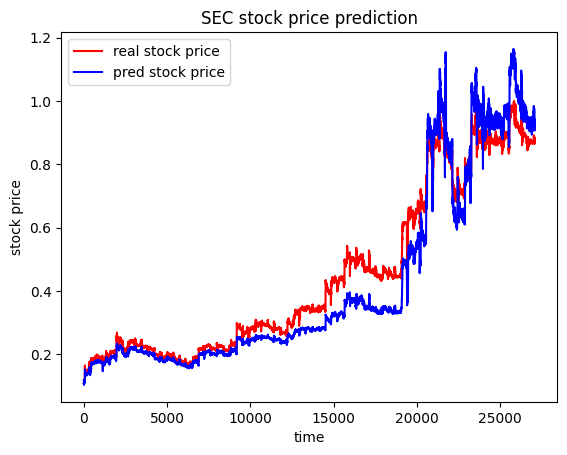

    내일 주가 : [0.91844285]


In [31]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='pred stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("    내일 주가 :", dfy.close[-1] * pred_y[-1] / dfy.close[-1])

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)
    
mae = mean_absolute_error(test_y, pred_y)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)


Mean Squared Error: 0.004977062940800714
Mean Absolute Error: 0.05624684775800595
Root Mean Square Error: 0.0705483021822688


In [29]:
model.save('./lstmmodel.h5')